In [1]:
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")
print("All python modules loaded")

All python modules loaded


In [3]:
df = pd.read_csv("/home/vehicles.csv")
df.info()
display(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102718 entries, 0 to 102717
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            102718 non-null  int64  
 1   region        102718 non-null  object 
 2   price         102718 non-null  int64  
 3   year          102287 non-null  float64
 4   manufacturer  98201 non-null   object 
 5   model         101390 non-null  object 
 6   condition     63271 non-null   object 
 7   cylinders     61272 non-null   object 
 8   fuel          102100 non-null  object 
 9   odometer      101182 non-null  float64
 10  title_status  100399 non-null  object 
 11  transmission  102160 non-null  object 
 12  VIN           65803 non-null   object 
 13  drive         71303 non-null   object 
 14  size          28779 non-null   object 
 15  type          82643 non-null   object 
 16  paint_color   72214 non-null   object 
 17  state         102717 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
87632,7301823649,new haven,14950,2017.0,nissan,altima,NaN,NaN,gas,35513.0,clean,automatic,1N4AL3AP1HC129163,fwd,NaN,sedan,silver,ct
8314,7307493009,kenai peninsula,12900,2017.0,dodge,journey,NaN,6 cylinders,gas,49564.0,rebuilt,automatic,3C4PDDBG8HT578110,NaN,NaN,SUV,green,ak
77167,7315904271,denver,27590,2015.0,toyota,sienna limited premium,good,6 cylinders,gas,47086.0,clean,other,5TDYK3DC4FS656159,fwd,NaN,van,silver,co
38956,7307575822,modesto,14999,2013.0,bmw,x1,NaN,NaN,gas,55988.0,clean,automatic,WBAVM5C50DVV90561,NaN,NaN,SUV,blue,ca
33450,7316574555,los angeles,11495,2009.0,bmw,550i,NaN,NaN,gas,113883.0,clean,automatic,WBANW53559CT55568,NaN,NaN,sedan,silver,ca


In [4]:
df['price'] = df['price'].fillna(df['price'].mean())
df = df[~np.isinf(df['price'])]
print(df)

                id                  region  price    year manufacturer  \
0       7222695916                prescott   6000     NaN          NaN   
1       7218891961            fayetteville  11900     NaN          NaN   
2       7221797935            florida keys  21000     NaN          NaN   
3       7222270760  worcester / central MA   1500     NaN          NaN   
4       7210384030              greensboro   4900     NaN          NaN   
...            ...                     ...    ...     ...          ...   
102713  7312273853                   ocala  38990  2017.0         jeep   
102714  7312178399                   ocala   3400  2006.0     chrysler   
102715  7312074484                   ocala  11400  2015.0       toyota   
102716  7312068494                   ocala  13990  2012.0     chrysler   
102717  7312056170                   ocala  33998  2018.0         ford   

                             model  condition    cylinders fuel  odometer  \
0                              NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102718 entries, 0 to 102717
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            102718 non-null  int64  
 1   region        102718 non-null  object 
 2   price         102718 non-null  int64  
 3   year          102287 non-null  float64
 4   manufacturer  98201 non-null   object 
 5   model         101390 non-null  object 
 6   condition     63271 non-null   object 
 7   cylinders     61272 non-null   object 
 8   fuel          102100 non-null  object 
 9   odometer      101182 non-null  float64
 10  title_status  100399 non-null  object 
 11  transmission  102160 non-null  object 
 12  VIN           65803 non-null   object 
 13  drive         71303 non-null   object 
 14  size          28779 non-null   object 
 15  type          82643 non-null   object 
 16  paint_color   72214 non-null   object 
 17  state         102717 non-null  object 
dtypes: f

In [6]:
has_nan = df['price'].isna().any().sum()
has_inf = np.isinf(df['price']).any().sum()
df_cleaned = df[~np.isinf(df['price'])]
has_inf = np.isinf(df_cleaned['price']).any().sum()
print(has_nan)
print(has_inf)

0
0


In [7]:
df.isna().sum()

,0
id,0
region,0
price,0
year,431
manufacturer,4517
model,1328
condition,39447
cylinders,41446
fuel,618
odometer,1536


In [8]:
df.isna().mean().round(4)*100

,0
id,0.00
region,0.00
price,0.00
year,0.42
manufacturer,4.40
model,1.29
condition,38.40
cylinders,40.35
fuel,0.60
odometer,1.50


In [9]:
sum(df.duplicated())

0

In [10]:
df.shape[0]

102718

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [11]:
pd.set_option('display.float_format', '{:.2f}'.format)
df[['price']].describe()

,price
count,102718.00
mean,108626.68
std,14521758.55
min,0.00
25%,5999.00
50%,13999.00
75%,25995.00
max,3024942282.00


In [12]:
p = [0.05, 0.85, 0.95, 0.99]
df[['price']].describe(p)

,price
count,102718.00
mean,108626.68
std,14521758.55
min,0.00
5%,0.00
50%,13999.00
85%,32900.00
95%,44995.00
99%,68367.00
max,3024942282.00


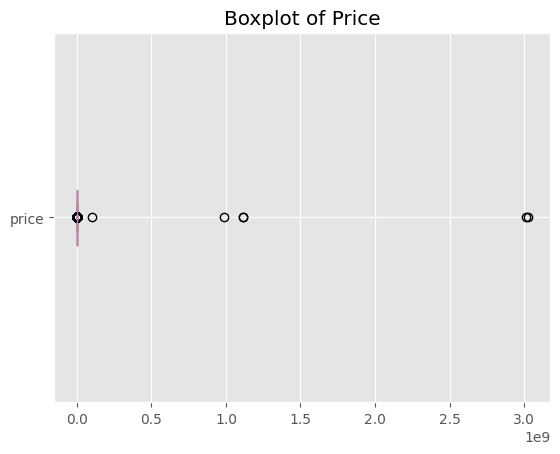

In [13]:
df['price'].plot(kind = 'box', vert = False, title = 'Boxplot of Price');

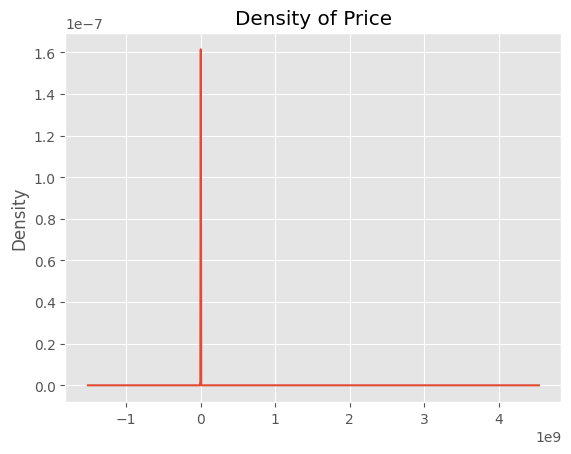

In [14]:
df['price'].plot(kind = 'density', title = 'Density of Price');

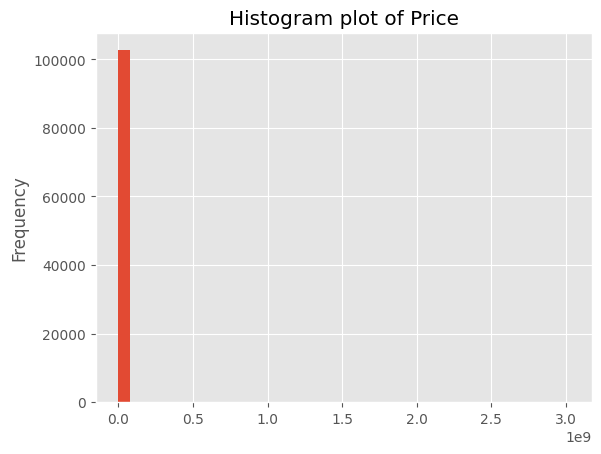

In [15]:
df['price'].plot(kind = 'hist', bins = 40, title = 'Histogram plot of Price');

In [16]:
df['priceLog'] = np.log(df['price'])
df.head(3)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,priceLog
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,8.70
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,9.38
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,9.95


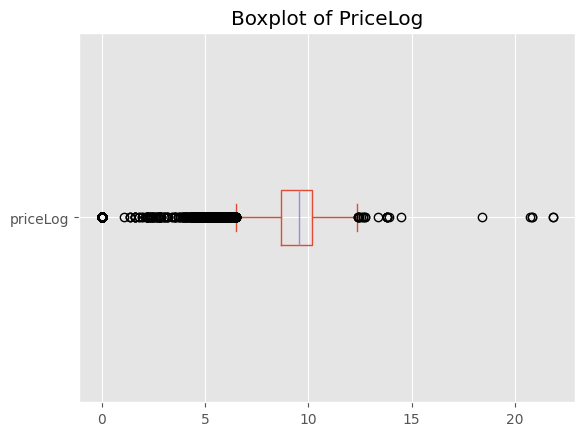

In [17]:
df['priceLog'].plot(kind = 'box', vert = False, title = 'Boxplot of PriceLog');

In [18]:
df_cleaned = df[~np.isinf(df['priceLog'])]

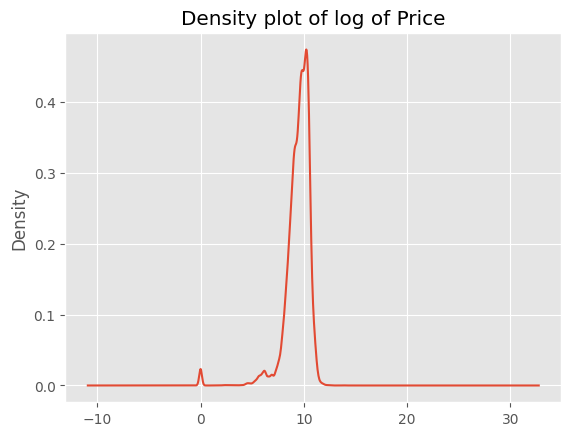

In [19]:
df_cleaned['priceLog'].plot(kind = 'kde', title = 'Density plot of log of Price');

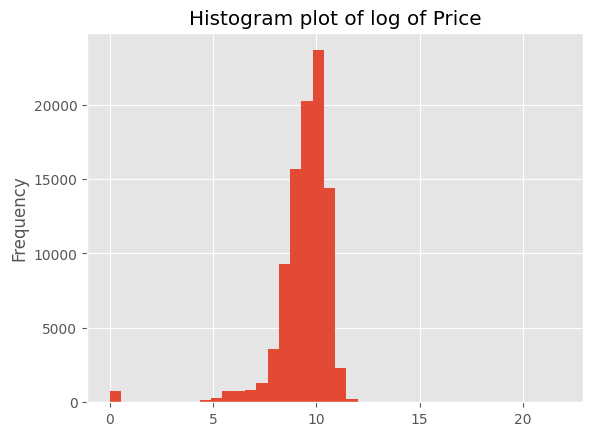

In [20]:
df_cleaned['priceLog'].plot(kind = 'hist', bins = 40, title = 'Histogram plot of log of Price');

In [21]:
df.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,priceLog
82457,7308025076,western slope,5995,2012.00,dodge,avenger 4dr sdn se,NaN,4 cylinders,NaN,164519.00,clean,automatic,1C3CDZAB2CN322883,fwd,NaN,sedan,white,co,8.70
13080,7311190919,prescott,48995,2015.00,ford,f-250 superduty xlt crew cab 6.7 liter,NaN,8 cylinders,other,67318.00,clean,automatic,1FT7W2BT9FEA95749,4wd,NaN,pickup,silver,az,10.80
94514,7314746966,ft myers / SW florida,9990,2014.00,chevrolet,cruze ls automatic,NaN,NaN,gas,44203.00,clean,automatic,1G1PA5SH3E7212121,fwd,NaN,sedan,red,fl,9.21
100654,7306485111,jacksonville,8400,2010.00,bmw,535i xdrive,NaN,NaN,gas,112500.00,clean,automatic,NaN,NaN,NaN,NaN,NaN,fl,9.04
50037,7313023192,reno / tahoe,5000,2002.00,ford,explorer xlt,good,8 cylinders,gas,115000.00,clean,automatic,NaN,4wd,full-size,SUV,NaN,ca,8.52
71471,7306191866,yuba-sutter,35990,2018.00,jaguar,e-pace p250 se sport,good,NaN,gas,8490.00,clean,other,SADFP2FX0J1Z05358,NaN,NaN,other,black,ca,10.49
42493,7315052235,orange county,34000,2016.00,jeep,wrangler unlimited,excellent,NaN,gas,33500.00,clean,automatic,NaN,NaN,NaN,NaN,NaN,ca,10.43
46084,7315889280,redding,3990,1999.00,chevrolet,venture ls 4dr extend,like new,6 cylinders,gas,51000.00,clean,automatic,1GNDX03E5XD220085,fwd,full-size,mini-van,red,ca,8.29
64509,7314175370,stockton,14985,2013.00,audi,q5,excellent,NaN,gas,84182.00,clean,automatic,WA1DGAFP2DA068401,4wd,NaN,SUV,grey,ca,9.61
21741,7313976389,bakersfield,0,2014.00,nissan,rogue,NaN,NaN,gas,47287.00,clean,automatic,5N1AT2MT9EC819313,fwd,full-size,SUV,white,ca,-inf


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [22]:
df_zscore = df[np.abs(stats.zscore(df['price'])) < 0.5].copy()

In [23]:
df_zscore.shape

(102712, 19)

In [24]:
zscore_data_lost = 1 - (df_zscore.shape[0]/df.shape[0])
print("We lost {:.6%} of the data by the z-score method" .format(zscore_data_lost))

We lost 0.005841% of the data by the z-score method


In [25]:
df_zscore['price'].describe()

,price
count,102712.00
mean,17656.63
std,18673.58
min,0.00
25%,5999.00
50%,13998.00
75%,25995.00
max,2000000.00


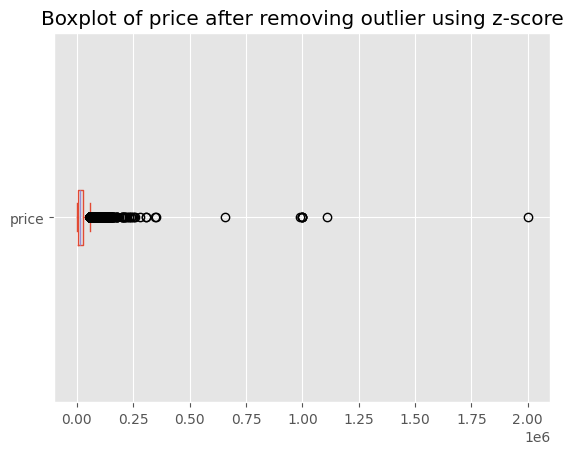

In [26]:
df_zscore['price'].plot(kind = 'box', vert = False, title = "Boxplot of price after removing outlier using z-score");

In [27]:
irq = df['price'].quantile(.75) - df['price'].quantile(.25)
irq

np.float64(19996.0)

In [28]:

lower_bound = df['price'].quantile(.25) - 1.5 * irq
upper_bound = df['price'].quantile(.75) + 1.5 * irq
df_irq = df[(df['price'] > lower_bound) & (df['price'] > upper_bound)].copy()

In [29]:
irq_data_lost = 1 - (df_irq.shape[0]/df.shape[0])
print("We lost {:.2%} of the data by the IRQ method" .format(irq_data_lost))

We lost 97.66% of the data by the IRQ method


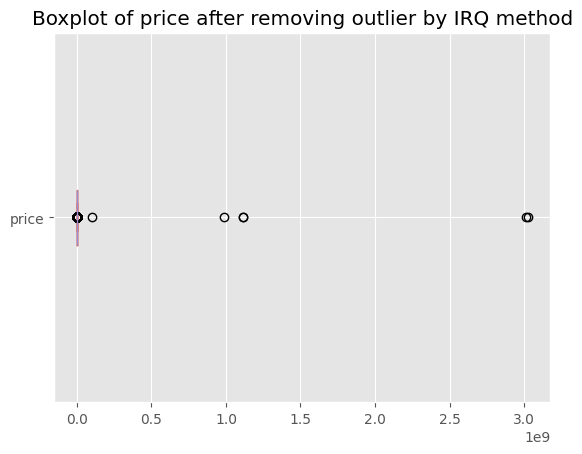

In [30]:
df_irq['price'].plot(kind = 'box' , vert = False, title = "Boxplot of price after removing outlier by IRQ method");

In [31]:
df_irq['price'].describe()

,price
count,2407.00
mean,3958119.12
std,94803842.89
min,55990.00
25%,59990.00
50%,65995.00
75%,74945.00
max,3024942282.00


<Axes: xlabel='odometer', ylabel='price'>

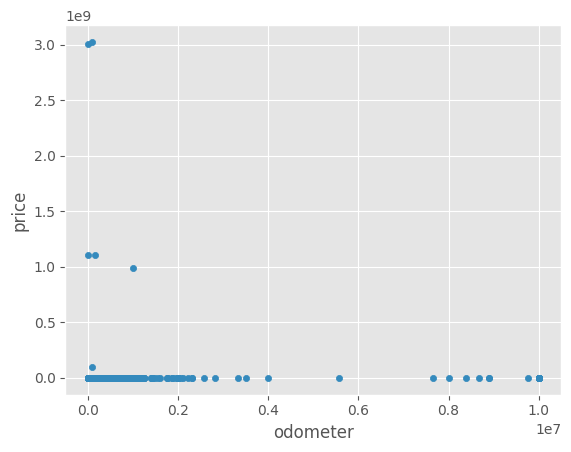

In [32]:
df.plot(kind = 'scatter', x = "odometer" , y = "price")

<Axes: >

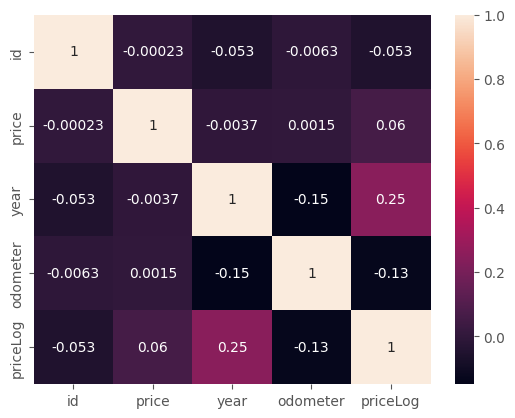

In [33]:
correlation = df.corr(numeric_only = True)
sns.heatmap(correlation, annot = True)

<Axes: >

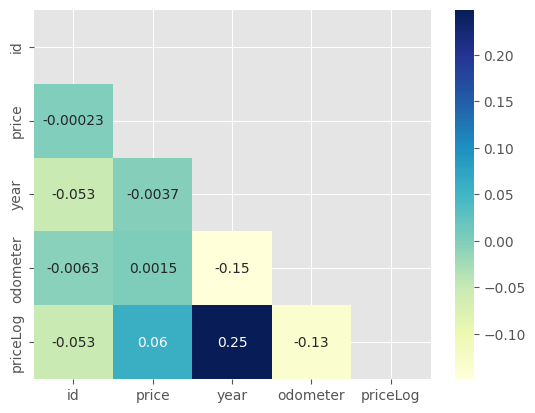

In [34]:
mask = np.triu(np.ones_like(df.corr(numeric_only = True).round(2)))
sns.heatmap(correlation, annot=True, mask=mask, cmap="YlGnBu")

In [35]:
df['title_status'].unique()

array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only'], dtype=object)

In [36]:
df['transmission'].unique()

array([nan, 'other', 'automatic', 'manual'], dtype=object)

In [37]:
df['condition'].unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [38]:
df.groupby('transmission')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,79822.00,120919.76,16098161.70,0.00,5400.00,11988.00,22990.00,3024942282.00
manual,6784.00,159441.95,11991025.09,0.00,4500.00,9000.00,18000.00,987654321.00
other,15554.00,26723.10,17724.04,0.00,19775.00,26990.00,33990.00,1000000.00


In [39]:
df.groupby('title_status')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
title_status,,,,,,,,
clean,97652.00,113541.59,14893663.16,0.00,6000.00,14500.00,26500.00,3024942282.00
lien,285.00,23836.06,20866.12,1.00,9500.00,18500.00,32000.00,158000.00
missing,225.00,4573.62,6278.16,0.00,950.00,2500.00,5500.00,37500.00
parts only,51.00,3239.18,5077.90,0.00,500.00,1100.00,3750.00,27000.00
rebuilt,921.00,12186.00,10639.41,0.00,6000.00,9500.00,14999.00,140000.00
salvage,1265.00,10079.20,29988.51,0.00,3400.00,6500.00,12500.00,1000000.00


In [40]:
df.groupby('condition')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
excellent,27865.00,15611.61,14942.89,0.00,6800.00,11900.00,19995.00,349999.00
fair,1649.00,4174.67,5362.07,0.00,1500.00,2800.00,5000.00,100000.00
good,28305.00,59860.72,6604188.41,0.00,8500.00,19990.00,29990.00,1111111111.00
like new,4997.00,18230.44,19077.61,0.00,6000.00,12900.00,25000.00,249999.00
new,281.00,29799.59,30683.83,0.00,4950.00,21203.00,46000.00,158000.00
salvage,174.00,3670.32,3744.17,0.00,1000.00,2500.00,5000.00,22000.00


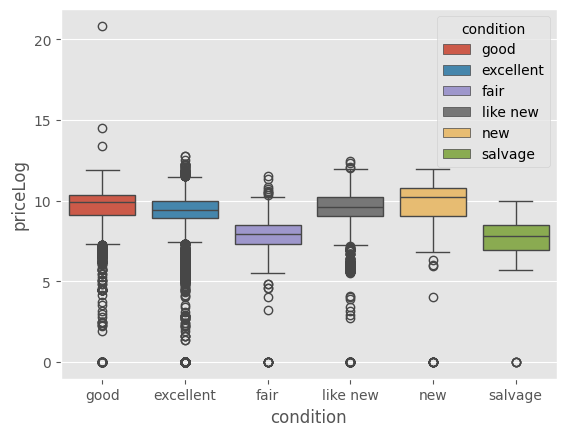

In [41]:
sns.boxplot(x = 'condition', y = 'priceLog', data = df, hue = 'condition');

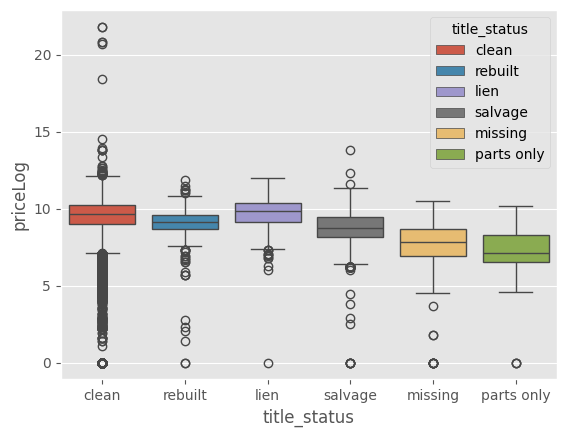

In [42]:
sns.boxplot(x = 'title_status', y = 'priceLog', data = df, hue = 'title_status');

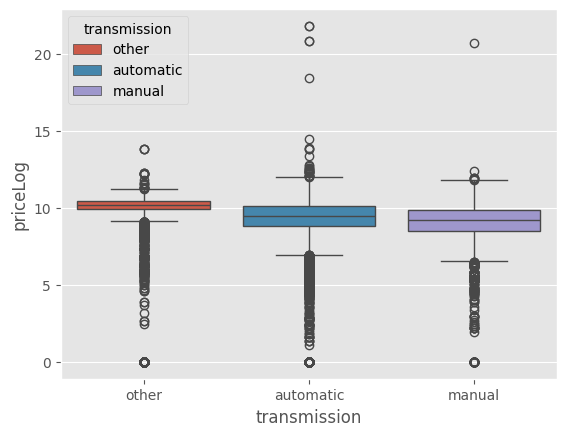

In [43]:
sns.boxplot(x = 'transmission', y = 'priceLog', data = df, hue = 'transmission');

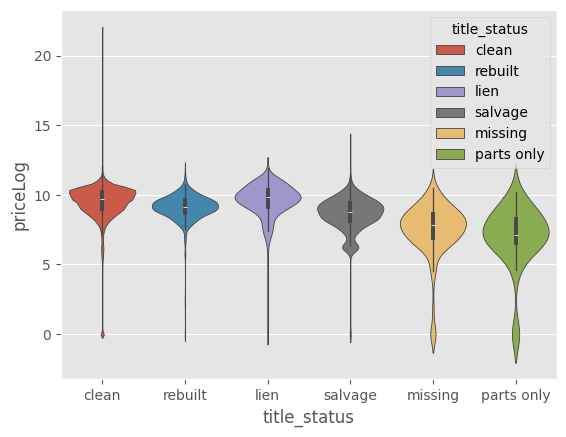

In [44]:
sns.violinplot(x = 'title_status', y = 'priceLog', data = df, hue = 'title_status');

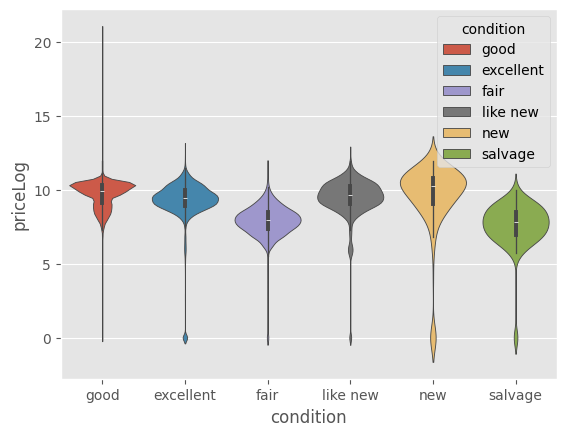

In [45]:
sns.violinplot(x = 'condition', y = 'priceLog', data = df, hue = 'condition');

In [46]:
df.select_dtypes(['int','float']).drop(columns = {'year', 'priceLog'}).head(3)

,id,price,odometer
0,7222695916,6000,NaN
1,7218891961,11900,NaN
2,7221797935,21000,NaN


In [47]:
numeric_col = df.select_dtypes(['int','float']).drop(columns = {'id', 'year', 'priceLog'}).columns.tolist()
df_numeric = df[numeric_col].copy()
df_numeric.sample(5)

,price,odometer
79542,11288,201995.00
61545,37990,28902.00
33779,38000,200.00
15009,0,70252.00
12056,19590,21639.00


In [48]:
numeric_col

['price', 'odometer']

In [49]:
df_numeric.isna().mean()

,0
price,0.00
odometer,0.01


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [50]:
X = df_numeric.drop(columns = 'price')
y = df_numeric['price']
X.info()
print("\n")
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102718 entries, 0 to 102717
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   odometer  101182 non-null  float64
dtypes: float64(1)
memory usage: 802.6 KB


<class 'pandas.core.series.Series'>
RangeIndex: 102718 entries, 0 to 102717
Series name: price
Non-Null Count   Dtype
--------------   -----
102718 non-null  int64
dtypes: int64(1)
memory usage: 802.6 KB


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state=23)
print(X_train.shape)
print(X_test.shape)
print("\n")
print(y_train.shape)
print(y_test.shape)

(82174, 1)
(20544, 1)


(82174,)
(20544,)


In [52]:
print(X_train.isna().sum())
print("\n")
print(X_test.isna().sum())

odometer    1224
dtype: int64


odometer    312
dtype: int64


In [53]:
from sklearn import set_config
set_config(transform_output="pandas")
from sklearn.impute import SimpleImputer

In [54]:
si = SimpleImputer(strategy = "median")
X_train = si.fit_transform(X_train)

X_test = si.transform(X_test)
print(X_train.isna().sum())
print(X_test.isna().sum())

odometer    0
dtype: int64
odometer    0
dtype: int64


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [55]:
y.mean().round(1)


np.float64(108626.7)

In [56]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor()
dummy.fit(X_train,y_train)
dummy_r2 = dummy.score(X_train,y_train)
print(dummy_r2)

dummy_predict = dummy.predict(X_test)
dummy_rmse = mean_squared_error( y_test, dummy_predict)
print(dummy_rmse)


0.0
500942942635265.4


Text(0.5, 1.0, 'Comparison of Real VS Predicted values from Dummy Regression')

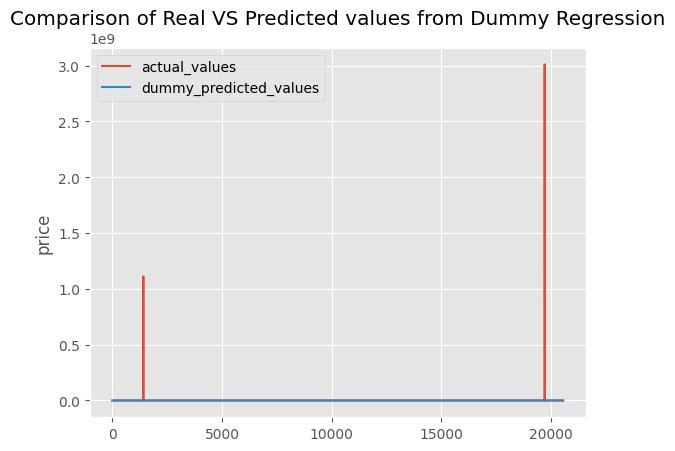

In [57]:
x = list(range(0,len(y_test)))
sns.lineplot(x=x, y = y_test, label = 'actual_values');
sns.lineplot(x=x, y = dummy_predict, label = 'dummy_predicted_values');
plt.title("Comparison of Real VS Predicted values from Dummy Regression")

In [58]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_r2 = (lr.score(X_train, y_train))
print("The value of lr_r2 is {: 2f}".format(lr_r2))

The value of lr_r2 is  0.000018


In [59]:
lr_predict = lr.predict(X_test)
lr_rmse = mean_squared_error(y_test, lr_predict)
print("The value of lr rmse is {: 2f}".format(lr_rmse))

The value of lr rmse is  500954862300709.875000


Text(0.5, 1.0, 'Comparison of Real VS Predicted values from Linear Regression')

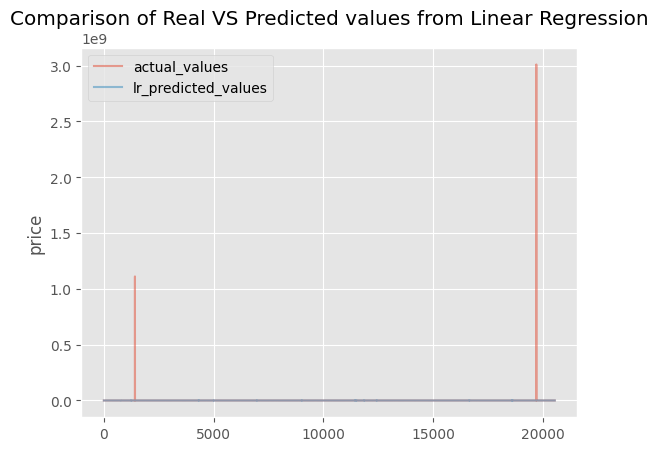

In [60]:
sns.lineplot(x=x, y=y_test, label = "actual_values", alpha = 0.5);
sns.lineplot(x=x, y = lr_predict, label = 'lr_predicted_values', alpha = 0.5);
plt.title("Comparison of Real VS Predicted values from Linear Regression")

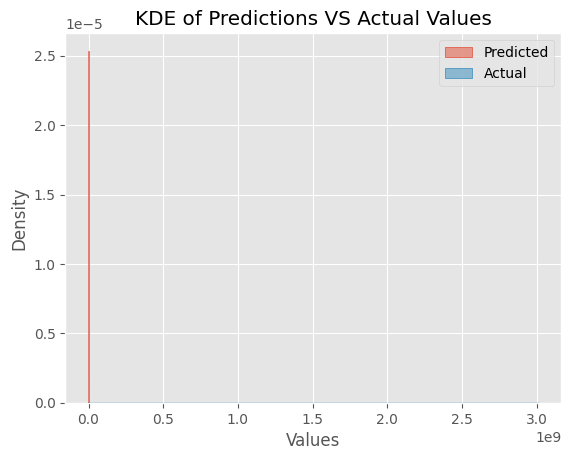

In [61]:
sns.kdeplot(lr_predict, label = 'Predicted', fill=True, alpha=0.5, bw_adjust=0.5);
sns.kdeplot(y_test, label = 'Actual', fill=True, alpha=0.5, bw_adjust=0.5);
plt.title("KDE of Predictions VS Actual Values");
plt.xlabel("Values");
plt.ylabel("Density");
plt.legend();
plt.show();

,Coefficients
odometer,0.20


<Axes: >

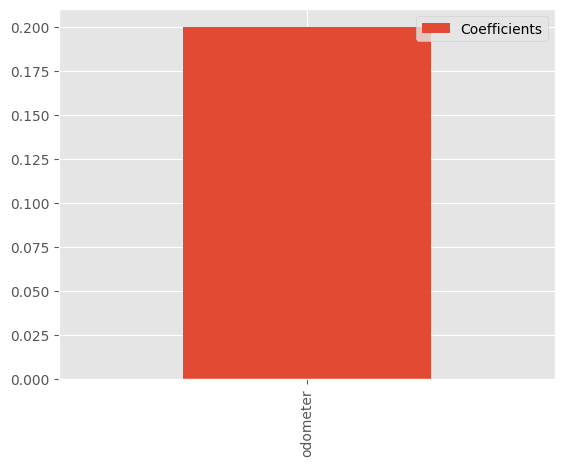

In [62]:
coeffs = pd.DataFrame(np.round(lr.coef_,1), X_train.columns, columns = ["Coefficients"])
display(coeffs)
coeffs.plot(kind = "bar")

In [63]:
df.select_dtypes("object").columns

Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102718 entries, 0 to 102717
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            102718 non-null  int64  
 1   region        102718 non-null  object 
 2   price         102718 non-null  int64  
 3   year          102287 non-null  float64
 4   manufacturer  98201 non-null   object 
 5   model         101390 non-null  object 
 6   condition     63271 non-null   object 
 7   cylinders     61272 non-null   object 
 8   fuel          102100 non-null  object 
 9   odometer      101182 non-null  float64
 10  title_status  100399 non-null  object 
 11  transmission  102160 non-null  object 
 12  VIN           65803 non-null   object 
 13  drive         71303 non-null   object 
 14  size          28779 non-null   object 
 15  type          82643 non-null   object 
 16  paint_color   72214 non-null   object 
 17  state         102717 non-null  object 
 18  pric

In [65]:
df.select_dtypes("object").agg(["nunique"])

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
nunique,87,41,12730,6,8,5,6,3,35426,3,4,13,12,18


In [66]:
dfc = df[['condition', 'title_status', 'odometer']]
dfc = pd.get_dummies(dfc.select_dtypes("object"), dtype = int, drop_first = True)
dfc.sample(5)

,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage
2985,0,0,0,0,0,0,0,0,0,0
74350,0,0,0,0,0,0,0,0,0,0
43332,0,0,0,0,0,0,0,0,0,0
90002,0,1,0,0,0,0,0,0,0,0
71136,0,0,0,0,0,0,0,0,0,0


In [67]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102718 entries, 0 to 102717
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   condition_fair           102718 non-null  int64
 1   condition_good           102718 non-null  int64
 2   condition_like new       102718 non-null  int64
 3   condition_new            102718 non-null  int64
 4   condition_salvage        102718 non-null  int64
 5   title_status_lien        102718 non-null  int64
 6   title_status_missing     102718 non-null  int64
 7   title_status_parts only  102718 non-null  int64
 8   title_status_rebuilt     102718 non-null  int64
 9   title_status_salvage     102718 non-null  int64
dtypes: int64(10)
memory usage: 7.8 MB


In [68]:
from sklearn import set_config
set_config(transform_output="pandas")
from sklearn.impute import SimpleImputer
X = dfc
y = df_numeric['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state=23)
print(X_train.shape)
print(X_test.shape)
print("\n")
print(y_train.shape)
print(y_test.shape)

(82174, 10)
(20544, 10)


(82174,)
(20544,)


In [69]:
print(X_train.isna().sum())

condition_fair             0
condition_good             0
condition_like new         0
condition_new              0
condition_salvage          0
title_status_lien          0
title_status_missing       0
title_status_parts only    0
title_status_rebuilt       0
title_status_salvage       0
dtype: int64


In [70]:
print(X_test.isna().sum())

condition_fair             0
condition_good             0
condition_like new         0
condition_new              0
condition_salvage          0
title_status_lien          0
title_status_missing       0
title_status_parts only    0
title_status_rebuilt       0
title_status_salvage       0
dtype: int64


In [71]:
from sklearn import set_config
set_config(transform_output="pandas")
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = "most_frequent")
X_train = si.fit_transform(X_train)
X_test = si.transform(X_test)
print(X_train.isna().sum())
print(X_test.isna().sum())

condition_fair             0
condition_good             0
condition_like new         0
condition_new              0
condition_salvage          0
title_status_lien          0
title_status_missing       0
title_status_parts only    0
title_status_rebuilt       0
title_status_salvage       0
dtype: int64
condition_fair             0
condition_good             0
condition_like new         0
condition_new              0
condition_salvage          0
title_status_lien          0
title_status_missing       0
title_status_parts only    0
title_status_rebuilt       0
title_status_salvage       0
dtype: int64


In [72]:
y.mean().round(1)

np.float64(108626.7)

In [73]:
def ErMtx(y_train_true, y_train_pred, y_test_true, y_test_pred):
    errors = {}
    errors["Train_MAE"] = mean_absolute_error(y_train_true, y_train_pred)
    errors["Train_MSE"] = mean_squared_error(y_train_true, y_train_pred)
    errors["Train_RMAE"] = np.sqrt(errors["Train_MSE"])
    errors["Train_R2_Score"] = r2_score(y_train_true, y_train_pred)

    errors["Test_MAE"] = mean_absolute_error(y_test_true, y_test_pred)
    errors["Test_MSE"] = mean_squared_error(y_test_true, y_test_pred)
    errors["Test_RMAE"] = np.sqrt(errors["Test_MSE"])
    errors["Test_R2_Score"] = r2_score(y_test_true, y_test_pred)

    return errors
model_eval = []

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state=23)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(82174, 10)
(20544, 10)
(82174,)
(20544,)


In [75]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train_sc = scale.fit_transform(X_train)
x_test_sc = scale.fit_transform(X_test)

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [76]:
lr = LinearRegression()
lr.fit(x_train_sc, y_train)
y_train_pred = lr.predict(x_train_sc)
y_test_pred = lr.predict(x_test_sc)
error_lr = ErMtx(y_train, y_train_pred, y_test, y_test_pred)
error_lr

{'Train_MAE': 128641.80233066343,
 'Train_MSE': 138362184547413.89,
 'Train_RMAE': np.float64(11762745.621130038),
 'Train_R2_Score': 3.8215959083931494e-06,
 'Test_MAE': 265422.82904034434,
 'Test_MSE': 500938166778833.25,
 'Test_RMAE': np.float64(22381647.99068275),
 'Test_R2_Score': -2.803322442024303e-05}

In [77]:
error_lr['Model Name']='Linear Regression'
error_lr
model_evaluation = (pd.DataFrame([error_lr]))
model_evaluation

,Train_MAE,Train_MSE,Train_RMAE,Train_R2_Score,Test_MAE,Test_MSE,Test_RMAE,Test_R2_Score,Model Name
0,128641.80,138362184547413.89,11762745.62,0.00,265422.83,500938166778833.25,22381647.99,-0.00,Linear Regression


In [78]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('lasso', Lasso())
])

param_grid = {
    'lasso__alpha': [0.01, 0.1, 1, 10, 100],
    'poly__degree': [1,2,3,4]
}

In [79]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model_lasso = grid_search.best_estimator_
print(best_model_lasso)

Pipeline(steps=[('scale', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('lasso', Lasso(alpha=100))])


In [80]:
lasso = Lasso(alpha=100)
lasso.fit(x_train_sc, y_train)
y_train_pred = lasso.predict(x_train_sc)
y_test_pred = lasso.predict(x_test_sc)
error_lasso = ErMtx(y_train, y_train_pred, y_test, y_test_pred)
error_lasso['Model Name']='Lasso'
error_lasso

{'Train_MAE': 128597.77719942686,
 'Train_MSE': 138362184644358.95,
 'Train_RMAE': np.float64(11762745.62525089),
 'Train_R2_Score': 3.820895249528888e-06,
 'Test_MAE': 265376.9606975887,
 'Test_MSE': 500938218691615.4,
 'Test_RMAE': np.float64(22381649.150400322),
 'Test_R2_Score': -2.8136858443161827e-05,
 'Model Name': 'Lasso'}

In [81]:
model_evaluation = pd.concat([model_evaluation, (pd.DataFrame([error_lasso]))],ignore_index=True)
model_evaluation

,Train_MAE,Train_MSE,Train_RMAE,Train_R2_Score,Test_MAE,Test_MSE,Test_RMAE,Test_R2_Score,Model Name
0,128641.80,138362184547413.89,11762745.62,0.00,265422.83,500938166778833.25,22381647.99,-0.00,Linear Regression
1,128597.78,138362184644358.95,11762745.63,0.00,265376.96,500938218691615.38,22381649.15,-0.00,Lasso


In [82]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
])

param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100],
    'poly__degree': [1,2,3,4]
}

In [83]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model_ridge = grid_search.best_estimator_
print(best_model_ridge)

Pipeline(steps=[('scale', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('ridge', Ridge(alpha=100))])


In [84]:
best_model_ridge = Ridge(alpha=10)
best_model_ridge.fit(X_train, y_train)
y_train_pred = best_model_ridge.predict(X_train)
y_test_pred = best_model_ridge.predict(X_test)
error_ridge = ErMtx(y_train, y_train_pred, y_test, y_test_pred)
error_ridge['Model Name']='Ridge'
error_ridge

{'Train_MAE': 128604.40453355381,
 'Train_MSE': 138362184684728.08,
 'Train_RMAE': np.float64(11762745.626966864),
 'Train_R2_Score': 3.8206034864707306e-06,
 'Test_MAE': 265313.5686507871,
 'Test_MSE': 500938197206308.06,
 'Test_RMAE': np.float64(22381648.67042435),
 'Test_R2_Score': -2.8093967102460482e-05,
 'Model Name': 'Ridge'}

In [85]:
model_evaluation = pd.concat([model_evaluation, (pd.DataFrame([error_ridge]))],ignore_index=True)
model_evaluation

,Train_MAE,Train_MSE,Train_RMAE,Train_R2_Score,Test_MAE,Test_MSE,Test_RMAE,Test_R2_Score,Model Name
0,128641.80,138362184547413.89,11762745.62,0.00,265422.83,500938166778833.25,22381647.99,-0.00,Linear Regression
1,128597.78,138362184644358.95,11762745.63,0.00,265376.96,500938218691615.38,22381649.15,-0.00,Lasso
2,128604.40,138362184684728.08,11762745.63,0.00,265313.57,500938197206308.06,22381648.67,-0.00,Ridge
